In [44]:
# 데이터 전처리 및 데이터 증강
# 데이터 증강은 의외로 많이 쓰인다.
# 이미지는 torchvision
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

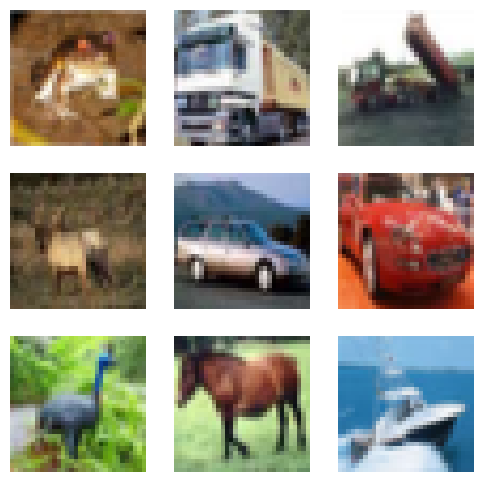

In [45]:
# 데이터셋 불러오기
training_dataset = CIFAR10(          # CIFAR-10 학습용 데이터셋 객체 생성
    root='./',                       # 데이터 저장(다운로드) 경로
    train=True,                      # 학습용(train) 분할 사용
    download=True,                   # 로컬에 없으면 인터넷에서 다운로드
    transform=ToTensor()             # PIL 이미지를 [0,1] 범위의 텐서(C×H×W)로 변환
)

test_dataset = CIFAR10(              # CIFAR-10 테스트용 데이터셋 객체 생성
    root='./',                       # 동일 경로 사용
    train=False,                     # 테스트(test) 분할 사용
    download=True,                   # 로컬에 없으면 다운로드
    transform=ToTensor()             # 동일하게 텐서로 변환
)

# 이미지 9개 출력
plt.figure(figsize=(6,6))            # 6×6인치 크기의 캔버스 생성(그림 전체 크기 조절)
for i in range(9):                   # 0~8까지 총 9장 반복
    image, label = training_dataset[i]   # i번째 샘플 읽기: (이미지 텐서, 정답 라벨)
    plt.subplot(3, 3, i+1)               # 3×3 격자 중 (i+1)번째 칸 활성화
    plt.imshow(image.permute(1, 2, 0))   # 채널우선(C×H×W) → H×W×C로 축 순서 변경 후 표시
    plt.axis('off')                      # 축 눈금/테두리 숨김(이미지만 보이게)
plt.show()                               # 화면에 모든 서브플롯 렌더링

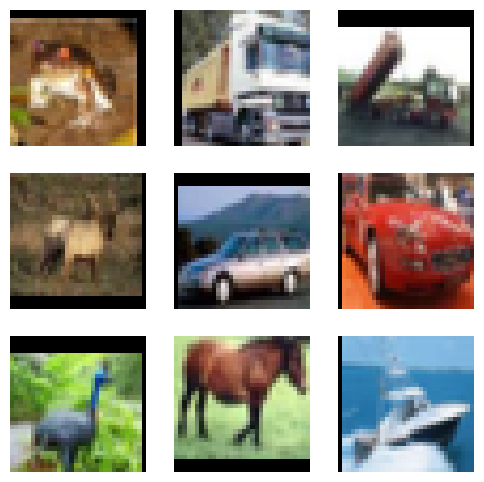

In [46]:
# 크롭핑과 뒤집기 추가
import torchvision.transforms as T                # torchvision의 변환(transform) 모듈을 T라는 이름으로 임포트
from torchvision.transforms import Compose        # 여러 변환을 순차적으로 적용하기 위한 함수
from torchvision.transforms import RandomHorizontalFlip, RandomCrop  # 랜덤 뒤집기, 랜덤 크롭 변환 불러오기


transform = Compose([
    #T.ToPILImage(),                                # 텐서를 PIL 이미지 객체로 변환 (다음 변환들이 PIL 전용이기 때문)
    RandomCrop((32,32), padding=4),                # 32×32 크기로 무작위 잘라내되, 외곽에 4픽셀 여백을 추가해 랜덤 영역 선택
    RandomHorizontalFlip(p=0.5),                    # 50% 확률로 이미지를 좌우 반전
    ToTensor()
])

training_dataset = CIFAR10(
    root='./',                                     # 데이터 저장 위치
    train=True,                                    # 학습용 데이터셋
    download=True,                                 # 없으면 다운로드
    transform=transform                            # 위에서 정의한 데이터 증강 적용
)

test_dataset = CIFAR10(
    root='./',                                     # 동일 경로
    train=False,                                   # 테스트용 데이터셋
    download=True,                                 # 없으면 다운로드
    transform=ToTensor()                           # 동일 증강 적용 (보통 테스트에는 증강 안 씀)
)

# 이미지 9개 출력
plt.figure(figsize=(6,6))                         # 시각화 영역 크기 설정
for i in range(9):
    image, label = training_dataset[i]             # 무작위로 증강된 학습 데이터 9개 가져오기
    plt.subplot(3, 3, i+1)                         # 3×3 격자 중 (i+1)번째 칸 활성화
    plt.imshow(image.permute(1, 2, 0))             # 채널 순서 변경 (C×H×W → H×W×C)
    plt.axis('off')                                # 축 숨김
plt.show()                                         # 증강된 이미지 9개 시각화

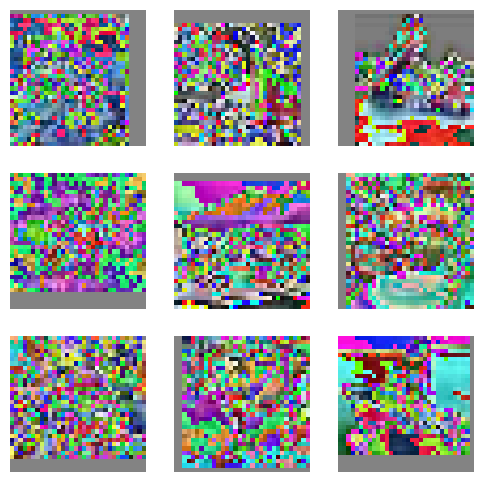

In [47]:
# 데이터 전처리에 정규화를 추가
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

transform = Compose([
    T.ToPILImage(),                                # 텐서를 PIL 이미지 객체로 변환 (다음 변환들이 PIL 전용이기 때문)
    RandomCrop((32,32), padding=4),                # 32×32 크기로 무작위 잘라내되, 외곽에 4픽셀 여백을 추가해 랜덤 영역 선택
    RandomHorizontalFlip(p=0.5),                    # 50% 확률로 이미지를 좌우 반전
    T.ToTensor(),
    # 데이터 정규화
    Normalize((0.5,0.5,0.5),(0.2,0.2,0.2)),
    T.ToPILImage()
])

training_dataset = CIFAR10(
    root='./',                                     # 데이터 저장 위치
    train=True,                                    # 학습용 데이터셋
    download=True,                                 # 없으면 다운로드
    transform=transform                            # 위에서 정의한 데이터 증강 적용
)

test_dataset = CIFAR10(
    root='./',                                     # 동일 경로
    train=False,                                   # 테스트용 데이터셋
    download=True,                                 # 없으면 다운로드
    transform=ToTensor()                           # 동일 증강 적용 (보통 테스트에는 증강 안 씀)
)

# 이미지 9개 출력
plt.figure(figsize=(6,6))                         # 시각화 영역 크기 설정
for i in range(9):
    #image, label = training_dataset[i]             # 무작위로 증강된 학습 데이터 9개 가져오기
    plt.subplot(3, 3, i+1)                         # 3×3 격자 중 (i+1)번째 칸 활성화
    plt.imshow(transform(training_dataset.data[i]))             # 채널 순서 변경 (C×H×W → H×W×C)
    plt.axis('off')                                # 축 숨김
plt.show()                                         # 증강된 이미지 9개 시각화

In [48]:
import torch.nn as nn
class BasicBlock(nn.Module):
    def __init__(self, int_channels, out_channels, hidden_dim):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(int_channels, hidden_dim,kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(hidden_dim, out_channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2)
    def forward(self,x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        out = self.pool(x)
        return out

In [49]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self,num_class):
        super(CNN,self).__init__()
        self.block1 = BasicBlock(3,64,64)
        self.block2 = BasicBlock(64,128,128)

        # 분류기
        self.fc1 = nn.Linear(128*8*8, 2048)
        self.fc2 = nn.Linear(2048, 256)
        self.fc3 = nn.Linear(256, num_class)
        self.relu = nn.ReLU()
    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        #(-1,128*8*8)
        x = torch.flatten(x,start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        out = self.fc3(x)
        return out

In [50]:
# 샘플 데이터 생성해서 구조 확인
X = torch.randn(4,3,32,32)
model = CNN(10)
model(X)

tensor([[-0.0373,  0.0462,  0.0482,  0.0649,  0.0595,  0.0182, -0.0451, -0.0593,
          0.0115, -0.0301],
        [-0.0381,  0.0468,  0.0476,  0.0650,  0.0595,  0.0178, -0.0422, -0.0590,
          0.0115, -0.0326],
        [-0.0386,  0.0465,  0.0449,  0.0659,  0.0579,  0.0189, -0.0423, -0.0609,
          0.0117, -0.0333],
        [-0.0360,  0.0456,  0.0479,  0.0679,  0.0594,  0.0207, -0.0417, -0.0623,
          0.0127, -0.0304]], grad_fn=<AddmmBackward0>)

In [51]:
%pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [52]:
from torchsummary import summary
model = CNN(10)
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
        BasicBlock-6           [-1, 64, 16, 16]               0
            Conv2d-7          [-1, 128, 16, 16]          73,856
              ReLU-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,584
             ReLU-10          [-1, 128, 16, 16]               0
        MaxPool2d-11            [-1, 128, 8, 8]               0
       BasicBlock-12            [-1, 128, 8, 8]               0
           Linear-13                 [-1, 2048]      16,779,264
             ReLU-14                 [-

In [53]:
for name, param in model.named_parameters():
    print(f'{name} {list(param.shape)}')

block1.conv1.weight [64, 3, 3, 3]
block1.conv1.bias [64]
block1.conv2.weight [64, 64, 3, 3]
block1.conv2.bias [64]
block2.conv1.weight [128, 64, 3, 3]
block2.conv1.bias [128]
block2.conv2.weight [128, 128, 3, 3]
block2.conv2.bias [128]
fc1.weight [2048, 8192]
fc1.bias [2048]
fc2.weight [256, 2048]
fc2.bias [256]
fc3.weight [10, 256]
fc3.bias [10]


In [54]:
model

CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=8192, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
)

In [55]:
# 레이어 접근 가능하고 변경도 가능
# model.fc3 = nn.Linear(in_features=256, out_features=2, bias=True)

In [ ]:
import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop,Normalize
from torch.optim import Adam
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor
from tqdm import tqdm
# 데이터 증강
transform = Compose([
    RandomCrop( (32,32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    # 데이터 정규화
    Normalize((0.5,0.5,0.5),(0.2,0.2,0.2)),    
])
# 데이터 셋
training_dataset =  CIFAR10(root = './',train = True,download = True,transform=transform)
test_dataset =  CIFAR10(root = './',train = False,download = True, transform=transform) 
# 데이터 로더
train_loader = DataLoader(training_dataset, batch_size=256,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256,shuffle=False)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN(10)
model.to(device)

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)
epochs = 20
# 학습루프
for epoch in range(epochs):
    for data, label in tqdm(train_loader,desc=f'epoch : {epoch+1}'):
        optim.zero_grad()
        preds = model(data.to(device))
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()
    if (epoch+1) % 10 == 0:
        print(f'epoch : {epoch+1}  loss : {loss.item()}')

torch.save(model.state_dict(), 'cifar.pth')

epoch : 1:  38%|███▊      | 75/196 [01:22<02:41,  1.34s/it]

In [ ]:
# 평가
model.load_state_dict(torch.load('CIFAR.pth',map_location=device))
# 예측
num_corr = 0
with torch.no_grad():
    for data, label in test_loader:
        output = model(data.to(device))
        preds = output.data.max(1)[1]
        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr
    print(f'Accuracy : {num_corr / len(test_dataset)}')